In [6]:
# --- Standard libraries
import heapq as hq
# --- PyTorch
import torch
import lightning as L
# --- RDKit
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
# --- Bokeh
from bokeh.io import output_notebook, show, export_svg
from bokeh.models import Label
from bokeh.layouts import row
output_notebook()
# --- Science python
from sklearn.metrics import root_mean_squared_error
from scipy.stats import wasserstein_distance, spearmanr
# --- Modules from local file
from utils.utils import bokeh_spectra, calculate_rse, bokeh_hist

Loading BokehJS ...

In [2]:
from schnetspec import SchNetspec
from schnet import SchNet

model = SchNet(hidden_channels=300, num_filters=200, num_interactions=6,
                  num_gaussians=50, cutoff=10.0)

In [3]:
model.load_state_dict(torch.load('./schnet_model.pt'))

/tmp/ipykernel_38417/3868485462.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('./schnet_model.pt'))


<All keys matched successfully>

In [4]:
test_dataset = torch.load("./processed/test_schnet.pt")
# --- Show details of the dataset
print(test_dataset[0])

Data(pos=[43, 3], z=[43], spectrum=[200], idx=[1], smiles='C12=[C:2]3[C:1]4([H:29])[C:23]([H:40])([c:22]5[c:20]1[c:16]1[c:18]([c:19]([H:38])[c:21]5[H:39])[C:17]([H:37])=[C:15]([H:36])[C:14]56[C:12]1=[C:8]1[C:4]27[C:6]([C:5]2([H:31])[C:3]3([H:30])[O:24]2)([C:7]([H:32])=[C:9]([H:33])[C:10]1([O:27][H:41])[C:11]([H:34])([H:42])[C:13]5([H:35])[O:28]6)[O:26]7)[O:25]4')


/tmp/ipykernel_38417/2698237931.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  test_dataset = torch.load("./processed/test_schnet.pt")


In [5]:
from utils.utils import schnet_pred
device = 'cpu'
# --- Create empty dictionary to contain spectra
pred = {}
tru = {}

# --- Loop over all molecules in test dateset and assign to dictionary index
for index in range(len(test_dataset)):
    pred[index], tru[index] = schnet_pred(model, index, test_dataset, device)

# --- Parse spectra into dictionary
model_dict = [pred, tru]

# # --- Save prediction results to file
# with open("ML_models/results/" + model_name, "wb") as file:
#     pkl.dump(model_dict, file)
    
# --- Get 
predict = model_dict[0]
true = model_dict[1]

In [9]:
predict[0]

tensor([-16.4975,  16.5920,   2.4162,  -4.1684,  17.9731,   0.3741, -35.3293,
         -2.8937, -12.4562,  -4.7446, -16.2981,  -2.7978,  -2.7667,   0.3163,
         10.6868,  -9.0067, -11.9548,  25.3347,   1.0127,  17.4828, -17.9380,
          6.5150, -16.7826,  23.5635, -16.8170,   9.3413, -13.4428, -15.5691,
        -12.3737,  13.9139,  -3.0749,  30.6617, -30.4789, -43.3324,   6.4497,
        -12.0383,   8.2979,  27.8412,  27.1703, -25.6165,   6.6434, -28.9768,
         15.9823,  15.5623,   7.5521,  23.6900,   5.4606,  34.3393,  -2.3615,
        -19.7180,  12.8683,  -3.8301,  -3.0675, -25.3923, -23.5868,   2.1211,
        -15.5268,  -7.4437,  10.4002,  -1.7618,  -4.0908, -35.4806, -16.8899,
        -37.8681, -33.9151,   4.3186, -23.3174, -29.9203,   4.6934,   6.7697,
          2.5158,  62.8084,  38.7043,  36.6568,  41.2875, -36.5286,  -8.8628,
        -10.7462, -27.5682, -13.7614, -12.0130,  24.1819, -21.3958,  -7.8959,
         19.1680,  13.1762,  18.3502,  24.0983,  43.6099,  -4.96

In [10]:
true[0]

array([1.32554563e-26, 1.63926430e-25, 1.91744042e-24, 2.12141106e-23,
       2.22008759e-22, 2.19771266e-21, 2.05798223e-20, 1.82304623e-19,
       1.52776278e-18, 1.21125232e-17, 9.08559899e-17, 6.44813943e-16,
       4.33012814e-15, 2.75155587e-14, 1.65460880e-13, 9.41634899e-13,
       5.07193549e-12, 2.58586468e-11, 1.24801336e-10, 5.70240910e-10,
       2.46701393e-09, 1.01067581e-08, 3.92136172e-08, 1.44115134e-07,
       5.01762315e-07, 1.65529752e-06, 5.17515264e-06, 1.53364381e-05,
       4.30894688e-05, 1.14804636e-04, 2.90128868e-04, 6.95619732e-04,
       1.58275035e-03, 3.41842347e-03, 7.01015769e-03, 1.36532225e-02,
       2.52618697e-02, 4.44156863e-02, 7.42275789e-02, 1.17942557e-01,
       1.78226694e-01, 2.56211430e-01, 3.50497961e-01, 4.56447989e-01,
       5.66116273e-01, 6.69065773e-01, 7.54047453e-01, 8.11204135e-01,
       8.34208012e-01, 8.21688533e-01, 7.77501822e-01, 7.09766984e-01,
       6.28992260e-01, 5.45870781e-01, 4.69350249e-01, 4.05402482e-01,
      

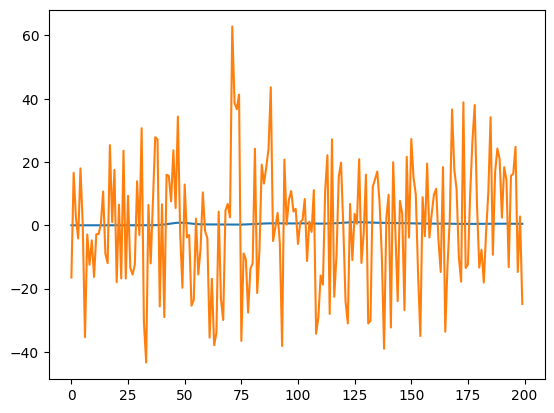

In [14]:
import matplotlib.pyplot as plt

plt.plot(true[0])
plt.plot(predict[0])
plt.show()